<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:Цыпченко Андрей Андреевич**


## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек

Импортируйте все используемые библиотеки здесь.

In [ ]:
# Ваш код здесь
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции

* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций.

## Загрузка данных [5 баллов]

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [ ]:
df_gender = pd.read_csv('gender.csv')
df_transactions = pd.read_csv('transactions.csv', sep=';')
print(df_transactions.isnull().sum())
df_gender.isnull().sum() #заодно проверим на пропуски
df_transactions

user_id    0
dt         0
type       0
value      1
dtype: int64


,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099
...,...,...,...,...
564861,14892960,101 10:41:59,"Различные продовольственные магазины — рынки, ...",1879.967
564862,14892960,102 07:55:60,"Различные продовольственные магазины — рынки, ...",2782.466
564863,14892960,111 00:00:00,"Различные продовольственные магазины — рынки, ...",2567.082
564864,14892960,111 08:50:13,"Различные продовольственные магазины — рынки, ...",467.802


In [ ]:
# df_transactions[['day', 'time']] = df_transactions['dt'].str.split(expand=True)

# преобразуем столбец 'time' в тип timedelta64[ns]
df_transactions['time'] = pd.to_timedelta(df_transactions['time'])
# df_transactions.groupby('user_id')['time'].mean()
# это всё для своей модельки в 4 задаче

## Подготовка данных [10 баллов]

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций.

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [ ]:
df = pd.DataFrame(df_transactions.groupby('user_id').sum())
df.columns = ['value_sum']
df['value_mean'] = df_transactions.groupby('user_id').mean()
df['value_std'] = df_transactions.groupby('user_id').std()
df = df.merge(df_gender, left_index=True, right_on='user_id')
col = df.pop('user_id')
df.insert(0,'user_id', col)
df.dropna(inplace=True)
df.isnull().sum()

user_id       0
value_sum     0
value_mean    0
value_std     0
gender        0
dtype: int64

### Отложенная выборка

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [ ]:
X = df.iloc[:,1:4]
y = df.iloc[:,-1]

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)
# print(X_train.isnull().sum(), X_test.isnull().sum(), y_train.isnull().sum(), y_test.isnull().sum())

## Обучение и оценка модели [5 баллов]

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

# стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# создаем объект класса LogisticRegression
lr = LogisticRegression()

# обучаем модель на обучающей выборке
lr.fit(X_train, y_train)

# предсказываем
predict = lr.predict(X_test)

# оцениваем качество модели на тестовой выборке
score = lr.score(X_test, y_test)
recall = recall_score(y_test, predict)
precision = precision_score(y_test, predict)

print("Accuracy: {:.2f}%".format(score * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 91.21%
Recall: 80.06%
Precision: 100.00%


### Валидация

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

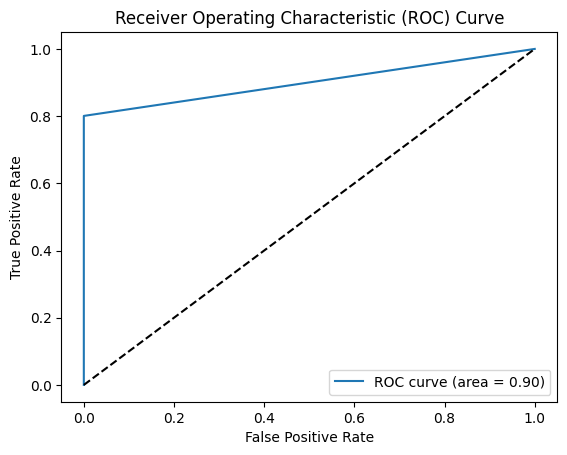

In [ ]:
#все кроме рок-аук уже посчитал :/
from sklearn.metrics import roc_curve, auc

# Вычисление TPR и FPR для разных пороговых значений
fpr, tpr, thresholds = roc_curve(y_test, predict)

# Построение ROC-кривой
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Модель получилась кал, не сильно отличается от константной. Из возможных причин: использование всего одного признака (хоть и дополненого тремя преобразованиями)__

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [ ]:
df_pivot = pd.pivot_table(df_transactions, values='value',
                          index='user_id', columns='type', aggfunc=np.sum)
df_pivot = df_pivot.fillna(0)

## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [ ]:
# готовим данные к разделению на выборки
df_pivot = df_pivot.merge(df_gender, left_index=True, right_on='user_id', )
df_pivot.drop(columns='user_id', axis= 1 , inplace= True )

# разделяем на выборки
X_train, X_test, y_train, y_test = train_test_split(df_pivot.iloc[:,:182],
                                                    df_pivot.iloc[:,-1],
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
# стандартизируем данные
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# обучаем модель на обучающей выборке
lr.fit(X_train, y_train)

# предсказываем
predict = lr.predict(X_test)

# оцениваем качество модели на тестовой выборке
score = lr.score(X_test, y_test)
recall = recall_score(y_test, predict)
precision = precision_score(y_test, predict)

print("Accuracy: {:.2f}%".format(score * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%


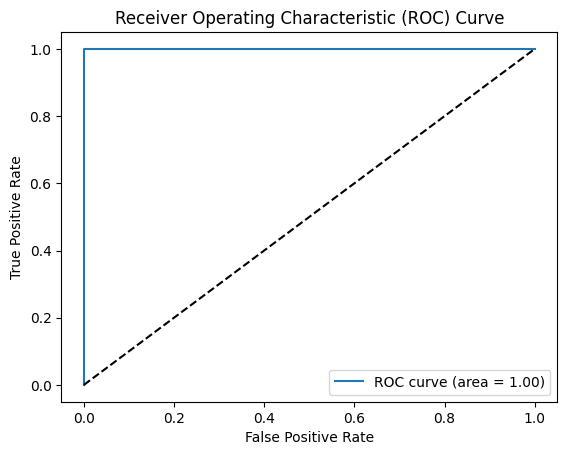

In [ ]:
# Вычисление TPR и FPR для разных пороговых значений
fpr, tpr, thresholds = roc_curve(y_test, predict)

# Построение ROC-кривой
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

__Получаем балдеж, но не тотальный. Цифры сильно красивее и рок-аук ближе к (0;1)__

### Вывод

Изменилось ли качество модели? Почему?

__Ваш вывод: Да, показатели ощутимо выросли. Рекол вообще х2 дал.__

# Часть 3: что мы всё про данные? Давайте про модель
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества.

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов]

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [ ]:
from sklearn import preprocessing
#вообще я стандартизировал, так что наврядли сильно что-то измениться, но это мы узнаем ниже
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

# Определение модели
model = LinearRegression()

# Определение сетки параметров для перебора
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, None]
}

# Определение метода оценки качества модели (ROC AUC) и выполнение перебора по сетке с кросс-валидацией на 4 фолдах
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Вывод результатов
print("Best score: %0.4f" % grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

Best score: 1.0000
Best parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}


Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


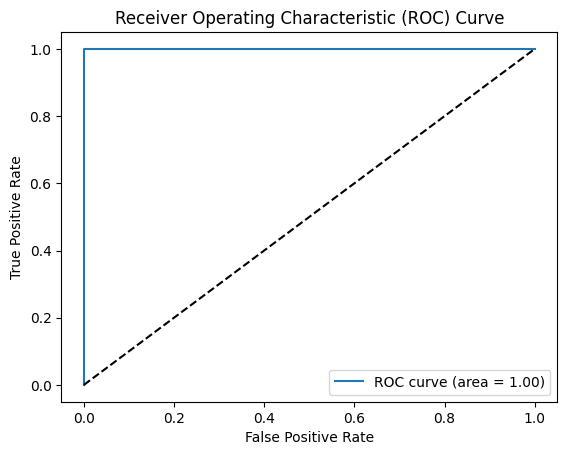

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

# Обучение модели с лучшими параметрами на тренировочном наборе данных
best_model = LinearRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Получение прогнозов на тестовом наборе данных
y_pred = best_model.predict(X_test)

# Вычисление основных метрик качества на тестовом наборе данных
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='micro')
recall = recall_score(y_test, y_pred.round(), average='micro')

# Вывод результатов
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Построение ROC-AUC кривой на тестовом наборе данных и вычисление значения ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Построение ROC-кривой
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Получилось ли добиться лучше качества при подборе параметров?
Почему так?

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__: Да, качество улучшилось, однако меня смущает близость метрик. Рок-аук хорош. Улучшилось потому что мы параметры подбирали так, чтобы модель улучшилась:) Кросс-валидацию и отложенную выборку использовали чтобы побольше данных на обучении прогнать и при этом не переобучится

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

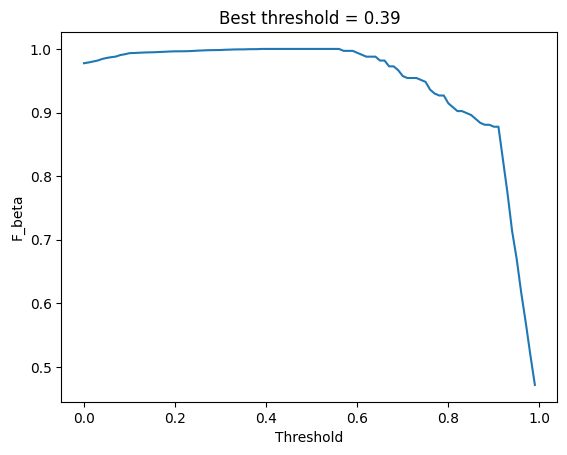

In [ ]:
from sklearn.metrics import fbeta_score

# Получение вероятностей принадлежности к положительному классу для тестовых данных
y_probs = best_model.predict(X_test)

# Перебор возможных порогов
fbetas = []
for threshold in np.arange(0, 1, 0.01):
    y_pred = (y_probs > threshold).astype(int)
    fbetas.append(fbeta_score(y_test, y_pred, beta=5))

# Нахождение порога, максимизирующего F_beta меру
best_threshold = np.arange(0, 1, 0.01)[np.argmax(fbetas)]

# Построение графика зависимости F_beta меры от порога разделения
plt.plot(np.arange(0, 1, 0.01), fbetas)
plt.xlabel('Threshold')
plt.ylabel('F_beta')
plt.title(f'Best threshold = {best_threshold:.2f}')
plt.show()

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=df_pivot.columns)
feature_names = X_train_df.columns.tolist()

# получение вектора коэффициентов модели
coef = best_model.coef_

# получение списка признаков, которые увеличивают вероятность метки 0
features_0 = [feature_names[i] for i in np.argsort(coef) if coef[i] < 0]

# получение списка признаков, которые увеличивают вероятность метки 1
features_1 = [feature_names[i] for i in np.argsort(coef)[::-1] if coef[i] > 0]

# вывод результатов
print("Признаки, увеличивающие вероятность метки 0:")
print(features_0)

print("Признаки, увеличивающие вероятность метки 1:")
print(features_1)

ValueError: ignored

# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__:

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [ ]:
df_pivot = pd.pivot_table(df_transactions, values='value',
                          index='user_id', columns='type', aggfunc=np.sum)
df_pivot = df_pivot.fillna(0)

# готовим данные к разделению на выборки
# df_pivot = df_pivot.merge(pd.DataFrame(df_transactions.groupby('user_id')['time'].mean()),
#                           left_on='user_id', right_index=True, )
df_pivot = df_pivot.merge(df_gender, left_index=True, right_on='user_id', )
df_pivot.drop(columns='user_id', axis= 1 , inplace= True )
# df_pivot.iloc[:,:185]
# pd.DataFrame(df_transactions.groupby('user_id')['time'].mean()).sort_index

# Преобразование timedelta64 в float64
# df_pivot['time'] = df_pivot['time'].apply(lambda x: x.total_seconds())

# разделяем на выборки
X_train, X_test, y_train, y_test = train_test_split(df_pivot.iloc[:,:184],
                                                    df_pivot.iloc[:,-1],
                                                    train_size=0.8,
                                                    random_state=42)
# нормализируем данные
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

df_pivot
# стандартизируем данные
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train

,"Звонки с использованием телефонов, считы","Звонки с использованием телефонов, считывающих магнитную ленту",gender
4595,0.0,306637.179,0.0
104,0.0,708182.230,0.0
7011,0.0,117191.906,0.0
7491,0.0,6288.566,1.0
8375,0.0,733897.969,0.0
...,...,...,...
6539,0.0,14823.048,0.0
2399,0.0,2695.099,0.0
6306,0.0,16395.187,0.0
4306,0.0,13026.313,1.0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# обучение модели XGBoost
model = xgb.XGBClassifier(n_estimators=135, max_depth=7, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# оценка качества модели на тестовой выборке
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC_AUC на тестовой выборке: {roc_auc:.3f}")

ROC_AUC на тестовой выборке: 1.000


In [ ]:
# создание модели
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# подбор параметров
params = {"learning_rate": [0.01, 0.1],
          "max_depth": [3, 5, 7],
          "min_child_weight": [1, 3, 5],
          "gamma": [0, 0.1, 0.3],
          "colsample_bytree": [0.5, 0.7, 0.9]}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# получение лучшей модели
best_xgb_model = grid_search.best_estimator_

# оценка качества на тестовой выборке
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

print("ROC-AUC:", roc_auc)


Accuracy: 0.7583732057416268
Precision: 0.7583732057416268
Recall: 0.7583732057416268


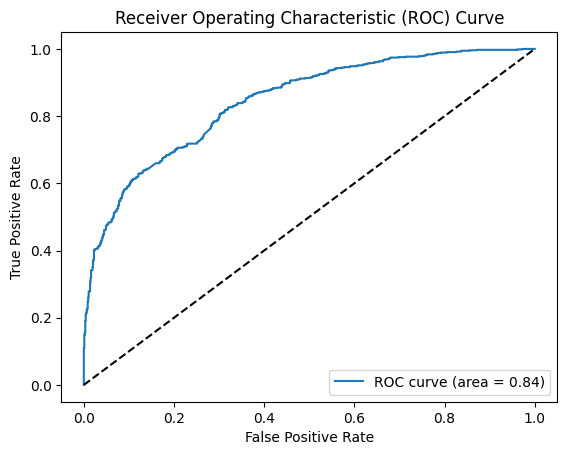

In [ ]:
# Вычисление основных метрик качества на тестовом наборе данных
accuracy = accuracy_score(y_test, y_probs.round())
precision = precision_score(y_test, y_probs.round(), average='micro')
recall = recall_score(y_test, y_probs.round(), average='micro')

# Вывод результатов
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Построение ROC-AUC кривой на тестовом наборе данных и вычисление значения ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Построение ROC-кривой
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

тотальный кал, 45 мин ждал чтоб тот же показатель получить

In [ ]:
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# создание модели
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# подбор параметров
params = {"learning_rate": [0.1,], #[0.095,0.105]
          "max_depth": [7], #[6.5, 7.5]
          "min_child_weight": [5], #[4.5, 5.5]
          "gamma": [0.1], #[0.075, 0.125]
          "colsample_bytree": [0.7], #[0.675, 0.725]
          "n_estimators": [135]} # 135

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# получение лучшей модели
best_xgb_model = grid_search.best_estimator_

# оценка качества на тестовой выборке
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

print("ROC-AUC:", roc_auc)

ROC-AUC: 0.8434030860651219


In [ ]:
best_xgb_model #0.8327066032972964

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=135, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)